## Prophet
https://facebook.github.io/prophet/

In [11]:
import pandas as pd 
from tqdm import tqdm
from prophet import Prophet

In [12]:
data_dir='./ground_pm25.csv'
var = 'haps'
df = pd.read_csv(data_dir)
df_prophet = df[['time',var]].rename(columns={'time':'ds',var:'y'})
print(df_prophet.head())
model = Prophet()
model.fit(df_prophet)

                    ds    y
0  2023-01-01 06:00:00  0.1
1  2023-01-01 07:00:00  0.1
2  2023-01-01 08:00:00  1.5
3  2023-01-01 09:00:00  1.5
4  2023-01-01 10:00:00  1.5


18:17:15 - cmdstanpy - INFO - Chain [1] start processing
18:17:16 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                      ds      yhat  yhat_lower  yhat_upper
0    2023-01-01 06:00:00  0.601542    0.075772    1.120985
1    2023-01-01 07:00:00  0.702413    0.180494    1.219132
2    2023-01-01 08:00:00  0.697574    0.124421    1.200125
3    2023-01-01 09:00:00  0.578583    0.055928    1.079484
4    2023-01-01 10:00:00  0.412098   -0.122518    0.952109
...                  ...       ...         ...         ...
9120 2024-12-27 05:00:00  1.336093    0.360906    2.280146
9121 2024-12-28 05:00:00  1.363396    0.375902    2.340607
9122 2024-12-29 05:00:00  1.479718    0.525646    2.468960
9123 2024-12-30 05:00:00  1.359545    0.367070    2.324154
9124 2024-12-31 05:00:00  1.381800    0.435456    2.342853

[9125 rows x 4 columns]


<Axes: >

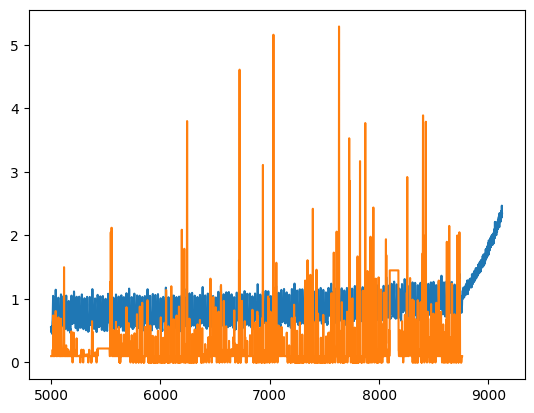

In [14]:
prophet_pm25=forecast['yhat_upper'].iloc[5000:]
observed_pm25=df_prophet['y'].iloc[5000:]
prophet_pm25.plot()
observed_pm25.plot()

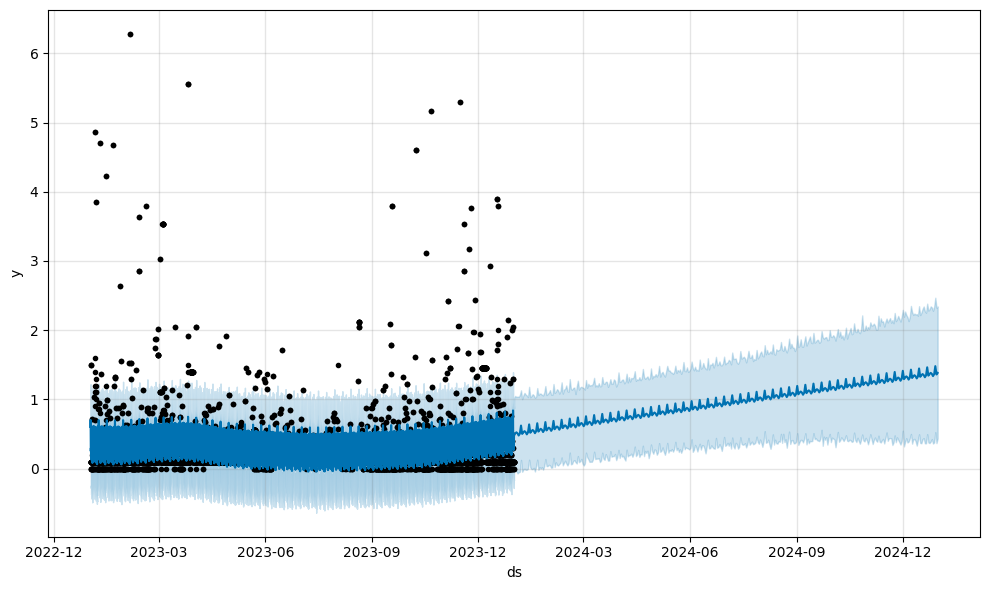

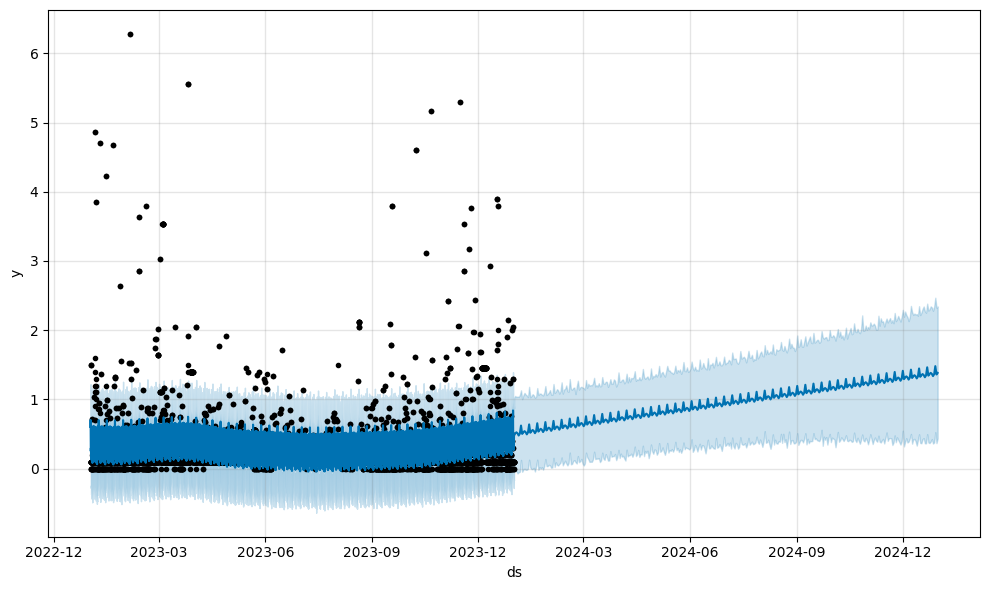

In [15]:
model.plot(forecast)

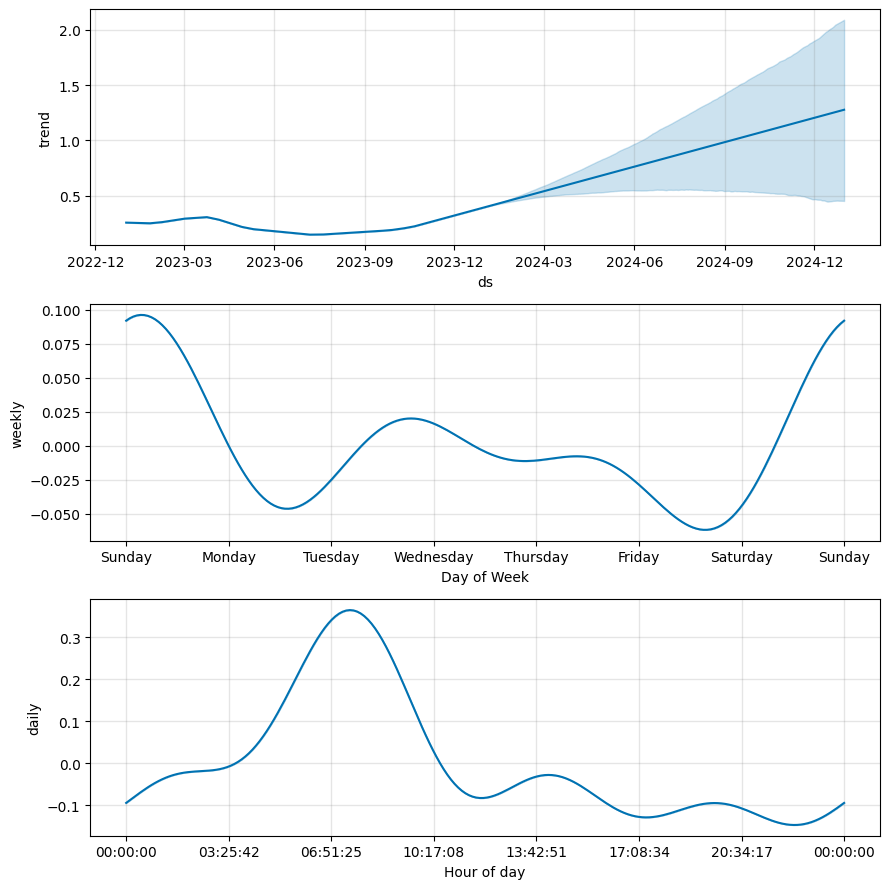

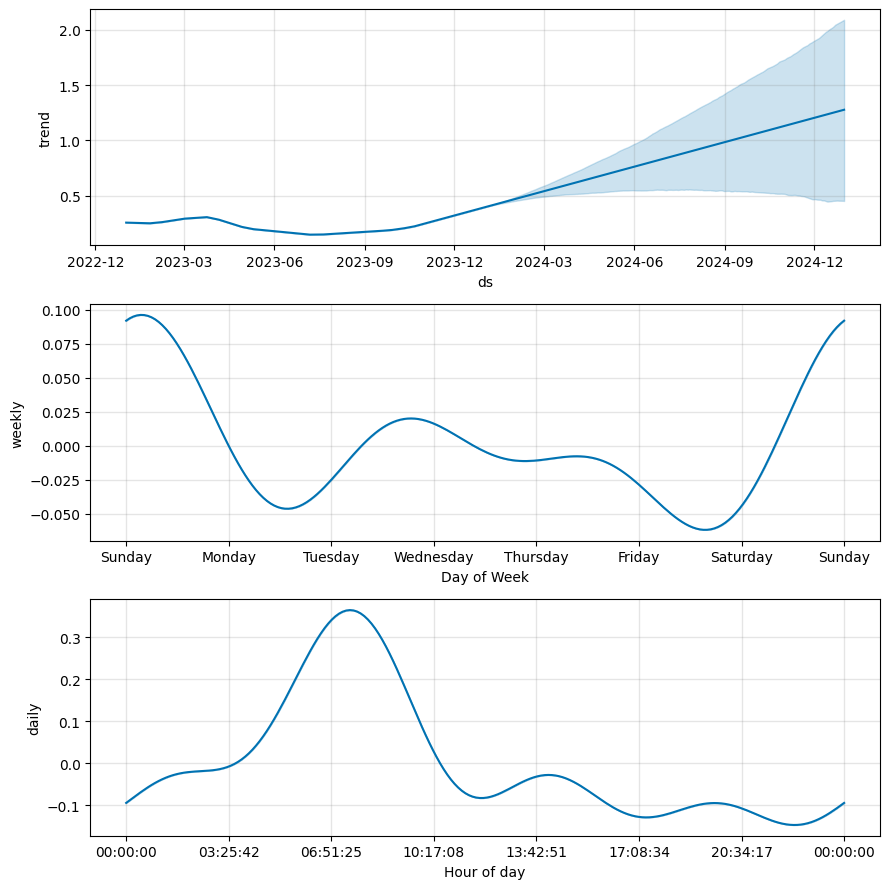

In [16]:
model.plot_components(forecast)